## Infinite

In [4]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

infinite_q_table = np.load('infinite_q_table.npy')
infinite_q_table_no_ace = np.zeros([19,2])
infinite_q_table_ace = np.zeros([19,2])


for index_s, state in enumerate(infinite_q_table): 
    for index_a, ace in enumerate(state): 
        if index_a == 1: 
            infinite_q_table_ace[index_s][0] = ace[0]
            infinite_q_table_ace[index_s][1] = ace[1]
            
        else: 
            infinite_q_table_no_ace[index_s][0] = ace[0]
            infinite_q_table_no_ace[index_s][1] = ace[1]


q_table_no_ace_df = pd.DataFrame(infinite_q_table_no_ace, columns=['stick NA', 'hit NA'], index=np.arange(2,21))
q_table_ace_df = pd.DataFrame(infinite_q_table_ace, columns=['stick A', 'hit A'], index=np.arange(2,21))

q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)
q_table

,stick NA,hit NA,stick A,hit A
2,4.0,479.687815,0.0,0.000000
3,9.0,471.891522,0.0,0.000000
4,16.0,468.392575,0.0,0.000000
5,25.0,462.426640,0.0,0.000000
6,36.0,453.882113,0.0,0.000000
7,49.0,448.593767,0.0,0.000000
8,64.0,444.124043,0.0,0.000000
9,81.0,438.880247,0.0,0.000000
10,100.0,428.318760,0.0,0.000000
11,121.0,431.601468,121.0,544.112987


In [5]:
track = np.load('trackerson_the_2nd.npy')
print(track.shape)

tracker_infinite = np.zeros([19,2])

for index_s, state in enumerate(track): 
    for index_p, ace in enumerate(state): 
            tracker_infinite[index_s][index_p] = ace
               
tracker_infinite_df = pd.DataFrame(tracker_infinite, columns=['no ace', 'ace'], index=np.arange(2,21))
tracker_infinite_df

(19, 2)


,no ace,ace
2,614716.0,0.0
3,614889.0,0.0
4,659992.0,0.0
5,704482.0,0.0
6,754109.0,0.0
7,804367.0,0.0
8,861304.0,0.0
9,919779.0,0.0
10,2827726.0,0.0
11,433822.0,616086.0


(19, 2)


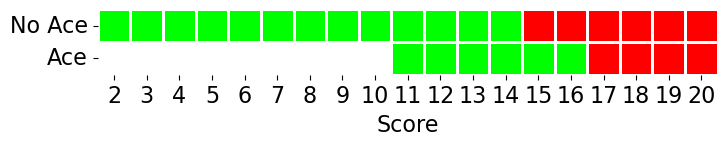

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 


infinite_q_policy = np.load('infinite_policy.npy')
print(infinite_q_policy.shape)
policy_df = pd.DataFrame(infinite_q_policy, columns=['No Ace', 'Ace'], index=np.arange(2,21))


plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1, figsize=(8, 2))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask1 = np.full_like(infinite_q_policy.T, False, dtype=bool)
mask1[1,0:9] = True

sns.heatmap(infinite_q_policy.T, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            linecolor='white', linewidths=1,
            ax=ax, cbar=False,
            square=True,
            mask=mask1)

ax.set_xlabel('Score', )
ax.set_yticklabels(('No Ace', 'Ace'))
ax.set_xticklabels(('2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'))
ax.tick_params('y', rotation=0)
plt.show()

## Finite

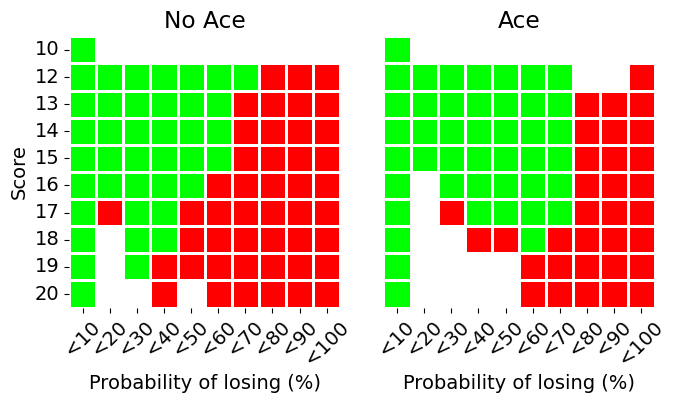

In [7]:
finite_q_policy = np.load('finite_policy.npy')
finite_q_policy_noace = np.zeros([19,10])
finite_q_policy_ace = np.zeros([19,10])
for index_s, state in enumerate(finite_q_policy): 
    for index_p, percentage in enumerate(state): 
        finite_q_policy_noace[index_s][index_p] = percentage[0]
        finite_q_policy_ace[index_s][index_p] = percentage[1]

finite_q_policy_noace = np.delete(finite_q_policy_noace,(0,1,2,3,4,5,6,7,8) ,axis=0)
finite_q_policy_ace = np.delete(finite_q_policy_ace,(0,1,2,3,4,5,6,7,8) ,axis=0)

q_policy_noace_df = pd.DataFrame(finite_q_policy_noace, columns=np.arange(0,10), index=np.arange(11,21))
#q_policy_noace_df.iloc[0:10,1:10]= 3
q_policy_ace_df = pd.DataFrame(finite_q_policy_ace, columns=np.arange(0,10), index=np.arange(11,21))


plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots( 1,2, figsize=(7, 7))  
cmap = ListedColormap(['#FF0000', '#00FF00'])

mask2 = np.full_like(q_policy_noace_df, False, dtype=bool)
for index, row in q_policy_noace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask2[index-11][i] = True

sns.heatmap(q_policy_noace_df, cmap=cmap, 
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[0], cbar=False,
            mask=mask2)

ax[0].set_xlabel('Probability of losing (%)')
ax[0].set_ylabel('Score')
ax[0].tick_params('y', rotation=0)
ax[0].set_yticklabels(('10','12','13','14','15','16','17','18','19','20'))
ax[0].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[0].tick_params('x', rotation=45)
ax[0].set_title('No Ace')

mask3 = np.full_like(q_policy_ace_df, False, dtype=bool)
for index, row in q_policy_ace_df.iterrows():
    for i, value in enumerate(row):
        if value == 2:
            mask3[index-11][i] = True

sns.heatmap(q_policy_ace_df, cmap=cmap,
            cbar_kws={'shrink': 0.8},
            square=True,
            linecolor='white', linewidths=1,
            ax=ax[1], cbar=False,
            mask=mask3)

ax[1].set_xlabel('Probability of losing (%)')
ax[1].set_ylabel('Score')
ax[1].tick_params('y', rotation=0)
ax[1].set_yticklabels(('   11','12','13','14','15','16','17','18','19','20'))
ax[1].get_yaxis().set_visible(False)
ax[1].set_xticklabels(('<10','<20','<30','<40','<50','<60','<70','<80','<90','<100'))
ax[1].tick_params('x', rotation=45)
ax[1].set_title('Ace')

fig.tight_layout()
plt.show()

In [8]:
#Finite Q-Table all.
finite_q_table = np.load('finite_q_table.npy')

finite_q_table_noace_hit = np.zeros([19,10])
finite_q_table_noace_stick = np.zeros([19,10])
finite_q_table_ace_hit = np.zeros([19,10])
finite_q_table_ace_stick = np.zeros([19,10])
for index_s, state in enumerate(finite_q_table): 
    for index_p, percentage in enumerate(state): 
        finite_q_table_noace_stick[index_s][index_p] = percentage[0,0] 
        finite_q_table_noace_hit[index_s][index_p] = percentage[0,1]
        finite_q_table_ace_stick[index_s][index_p] = percentage[1,0]
        finite_q_table_ace_hit[index_s][index_p] = percentage[1,1]

finite_q_table_noace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_noace_stick.ravel()]).reshape(finite_q_table_noace_stick.shape)
finite_q_table_noace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_noace_hit.ravel()]).reshape(finite_q_table_noace_hit.shape)
finite_q_table_ace_stick = np.array([f"{x:10.2f}" for x in finite_q_table_ace_stick.ravel()]).reshape(finite_q_table_ace_stick.shape)
finite_q_table_ace_hit = np.array([f"{x:10.2f}" for x in finite_q_table_ace_hit.ravel()]).reshape(finite_q_table_ace_hit.shape)

print("finite_q_table_noace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_stick]))
print("finite_q_table_noace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_noace_hit]))
print("finite_q_table_ace_stick")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_stick]))
print("finite_q_table_ace_hit")
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in finite_q_table_ace_hit]))

finite_q_table_noace_stick
      4.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
      9.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     16.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     25.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     36.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     49.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     64.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
     81.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
    100.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00      

In [9]:
# Finite Q-Table!
mux = pd.MultiIndex.from_product([[0,1,2,3,4,5,6,7,8,9], ['Hit', 'Stick']])

q_finite_values = np.load('finite_q_table.npy')


q_finite_no_ace = np.zeros([19,20])
q_finite_ace = np.zeros([19,20])


for index_s, state in enumerate(q_finite_values): #19
    
    for index_p, percentage in enumerate(state): #10

        i_1 = 0
        i_2 = 0 
        for index_a, ace in enumerate(state): # 2

            if index_a == 1: 
                
                q_finite_ace[index_s][i_1] = ace[1][0]
                i_1 += 1
                q_finite_ace[index_s][i_1] = ace[1][1]
                i_1 += 1
            else: 
                q_finite_no_ace[index_s][i_2] = ace[0][0]
                i_2 += 1 
                q_finite_no_ace[index_s][i_2] = ace[0][1]
                i_2 += 1
          
print(q_finite_no_ace.shape)


# q_table_no_ace_df = pd.DataFrame(q_table_no_ace, columns=mux, index=np.arange(2,21))
# q_table_ace_df = pd.DataFrame(q_table_ace, columns=mux, index=np.arange(2,21))

# q_table = pd.concat([q_table_no_ace_df, q_table_ace_df], axis=1)

# Create a MultiIndex for the columns
columns = pd.MultiIndex.from_product([range(10), ['stick', 'hit']],
                                     names=['%', 'action'])

# Reshape the numpy array into 19 rows and 20 columns (10 columns * 2 subcolumns)
#reshaped_data = q_finite_no_ace.reshape((19,20))


# Create the DataFrame
df = pd.DataFrame(q_finite_no_ace, columns=columns, index=np.arange(2,21))
df

(19, 20)


%           0                        1                  2              \
action  stick          hit       stick         hit  stick         hit   
2         4.0  1129.556288    0.000000    0.000000    0.0    0.000000   
3         9.0  1135.204255    0.000000    0.000000    0.0    0.000000   
4        16.0  1137.499667    0.000000    0.000000    0.0    0.000000   
5        25.0  1138.434831    0.000000    0.000000    0.0    0.000000   
6        36.0  1131.396074    0.000000    0.000000    0.0    0.000000   
7        49.0  1116.952660    0.000000    0.000000    0.0    0.000000   
8        64.0  1094.575809    0.000000    0.000000    0.0    0.000000   
9        81.0  1056.089159    0.000000    0.000000    0.0    0.000000   
10      100.0   985.747479    0.000000    0.000000    0.0    0.000000   
11      121.0   879.714117    0.000000    0.000000    0.0    0.000000   
12      144.0   987.474689  144.000000  551.905425  144.0  389.705380   
13      169.0   980.056081  169.000000  558.297877  169.0  400.066077   
14      196.0   965.274713  196.000000  558.080793  196.0  391.740551   
15      225.0   935.154174  225.000000  563.168516  225.0  388.865988   
16      256.0   892.099720  256.000000  551.438360  256.0  403.705352   
17      289.0   835.409521  289.000000  530.414064  289.0  383.452673   
18      324.0   751.188447  324.000000  505.207153  324.0  367.939517   
19      361.0   629.457020  361.000000  435.839067  361.0  315.100954   
20      400.0   441.000000    0.618371  354.931913  400.0  134.428698   

%                3                  4                  5                  6  \
action       stick         hit  stick         hit  stick         hit  stick   
2         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
3         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
4         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
5         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
6         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
7         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
8         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
9         0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
10        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
11        0.000000    0.000000    0.0    0.000000    0.0    0.000000    0.0   
12      144.000000  280.022494  144.0  243.801458  144.0  161.108731  144.0   
13      169.000000  284.179757  169.0  248.730975  169.0  163.073115  169.0   
14      196.000000  280.382282  196.0  256.104219  196.0  166.234143  196.0   
15      225.000000  277.002501  225.0  254.369565  225.0  174.082224  225.0   
16      256.000000  275.102317  256.0  252.778939  256.0  177.411266  256.0   
17      289.000000  277.878300  289.0  250.473004  289.0  179.647485  289.0   
18      324.000000  265.899306  324.0  258.475161  324.0  174.667805  324.0   
19      361.000000  179.888823  361.0  251.114361  361.0  169.141897  361.0   
20      399.990096    0.443368  400.0  233.614297  400.0  155.783483  400.0   

%                       7                 8                9       
action         hit  stick        hit  stick        hit stick  hit  
2         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
3         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
4         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
5         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
6         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
7         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
8         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
9         0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
10        0.000000    0.0   0.000000    0.0   0.000000   0.0  0.0  
11        0.000000    0.0   0.000000    0.0   0.000000   0

In [10]:
print(q_finite_values[10][1][0][1])


404.5910497837428


In [11]:
#Tracking info
trackerr = np.load('trackery_mcTrackerson.npy')
print(trackerr.shape)

tracker_noace = np.zeros([19,10])
tracker_ace = np.zeros([19,10])

for index_s, state in enumerate(trackerr): 
    for index_p, percentage in enumerate(state): 
            tracker_noace[index_s][index_p] = percentage[0]
            tracker_ace[index_s][index_p] = percentage[1]

tracker_noace_df = pd.DataFrame(tracker_noace, columns=np.arange(0,10), index=np.arange(2,21))

tracker_noace_df= tracker_noace_df.to_numpy()
tracker_noace_df = np.array([f"{x:10.2f}" for x in tracker_noace_df.ravel()]).reshape(tracker_noace_df.shape)
tracker_ace_df = pd.DataFrame(tracker_ace, columns=np.arange(0,10), index=np.arange(2,21))
tracker_ace_df = tracker_ace_df.to_numpy()
tracker_ace_df = np.array([f"{x:10.2f}" for x in tracker_ace_df.ravel()]).reshape(tracker_ace_df.shape)

print('tracker_noace_df:')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_noace_df]))
print('tracker_ace_df:')
print('\n'.join([' '.join(['{:4}'.format(item) for item in row]) for row in tracker_ace_df]))


(19, 10, 2)
tracker_noace_df:
 791189.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
 788526.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
 830918.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
 901779.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
 943437.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
1022620.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
1076959.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
1165019.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00
3603008.00       0.00       0.00       0.00       0.00       0.00       0.00       0.00   

In [49]:
import numpy as np
alpha_tracking_finite = np.load("tracking/alpha_track_finite_1.npy")
sumOfHand_finite = np.load("tracking/hand_sum_track_finite_1.npy")
sumOfHand_finite= np.convolve(sumOfHand_finite, np.ones(50000)/50000, mode='valid')
print('Done #1')

Done #1


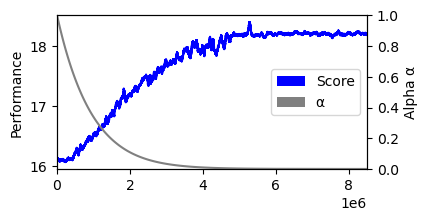

In [50]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Best: decay rate =   , epsilon =     , gamma = 1

fig, ax1 = plt.subplots(figsize=(4, 2))

ax1.set_xlim(0,8500000)

ax2 = ax1.twinx()  

#ax1.set_ylim(15.4, 19)
ax1.plot(sumOfHand_finite, color='blue')

ax1.set_ylabel('Performance')

ax2.set_ylim(0,1)
ax2.plot(alpha_tracking_finite, color='gray')
ax2.set_ylabel('Alpha α')

# Add a legend
handles = [
    plt.Rectangle((0,0), 1,1, fc='blue'),
    plt.Rectangle((0,0), 1,1, fc='gray'),
]
labels = ['Score', 'α']
ax1.legend(handles, labels, loc='center right')

plt.show()

In [46]:
import numpy as np
alpha_tracking_infinite = np.load("tracking/alpha_track_infinite.npy")
sumOfHand_infinite = np.load("tracking/hand_sum_track_infinite.npy")
y = int(len(sumOfHand_infinite)/15)
sumOfHand_infinite= np.convolve(sumOfHand_infinite, np.ones(y)/y, mode='valid')

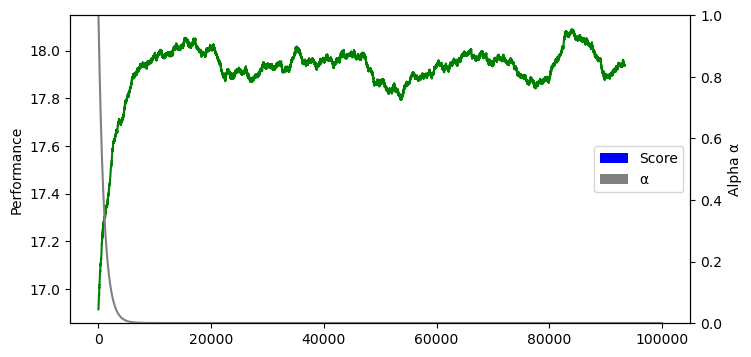

In [47]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Best: decay rate =   , epsilon =     , gamma = 1

fig, ax1 = plt.subplots(figsize=(8, 4))

#ax1.set_xlim(0,9e5)

ax2 = ax1.twinx()  

#ax1.set_ylim(15.4, 19)
ax1.plot(sumOfHand_infinite, color='green')

ax1.set_ylabel('Performance')

ax2.set_ylim(0,1)
ax2.plot(alpha_tracking_infinite, color='gray')
ax2.set_ylabel('Alpha α')

# Add a legend
handles = [
    plt.Rectangle((0,0), 1,1, fc='blue'),
    plt.Rectangle((0,0), 1,1, fc='gray'),
]
labels = ['Score', 'α']
ax1.legend(handles, labels, loc='center right')

plt.show()

In [16]:
def cumulative_sum_array(input_array):
    return np.cumsum(input_array)

sumOfPrevious = cumulative_sum_array(sumOfHand)


cumulativeSum = cumulative_sum_array(sumOfHand)



def create_index_plus_one_array(length):
    return np.arange(length) + 1


alpha_4 = alpha_tracking

numberOfHands = create_index_plus_one_array(len(sumOfHand))

averageValueOfHands_4 = np.divide(cumulativeSum, numberOfHands)
Value_of_hands_4 = sumOfHand

NameError: name 'sumOfHand' is not defined

In [12]:
#plt.plot(averageValueOfHands_1, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
# 



plt.plot(averageValueOfHands_2, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.2 trained for 100000 hands')
plt.plot(averageValueOfHands_3, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.8 trained for 100000 hands')
plt.plot(averageValueOfHands_4, label='epsilon = 0.25 , gamma = 1, decreasing alpha with decay rate 0.01 trained for 100000 hands')
# plt.plot(averageValueOfHands_5, label='decreasing alpha 50000 with decay rate 150')

plt.legend()

plt.show()

# plt.plot(averageValueOfHands_2, label='decreasing alpha 10000 with decay rate 5')
# plt.legend()

# plt.show()

# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()


# plt.plot(averageValueOfHands_3, label='decreasing alpha 50000 with decay rate 5')
# plt.legend()

# plt.show()



# plt.plot(alpha_5)
plt.plot(alpha_4 ,label = 'alpha with decay rate 0.01')
# plt.plot(alpha_3)
# plt.plot(alpha_2)
plt.plot(alpha_3, label = 'alpha with decay rate 0.8')
plt.plot(alpha_2, label = 'alpha with decay rate 0.2')
plt.legend()
plt.show()

NameError: name 'averageValueOfHands_2' is not defined